In [1]:
import pandas as pd
import numpy as np
import glob
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import locale
def getpreferredencoding(do_setlocale = True):
   return "utf-8"
locale.getpreferredencoding = getpreferredencoding
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")


import warnings
import itertools
import numpy as np

plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
os.getcwd()

'/Users/vishnumohan'

## LOADING DATA SETS

In [4]:
accidents_info = pd.read_csv('/Users/vishnumohan/Downloads/ML_DATASET/Accident_Information.csv',low_memory=False)

In [5]:
vehicles_info = pd.read_csv("/Users/vishnumohan/Downloads/ML_DATASET/Vehicle_Information.csv", encoding = 'unicode_escape')

In [6]:
accidents_info.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No


In [7]:
vehicles_info.head()

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,200401BS00001,26 - 35,3.0,Urban area,4.0,1588.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
1,200401BS00002,26 - 35,NaN,Urban area,3.0,NaN,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,Data missing or out of range,Front,2004
2,200401BS00003,26 - 35,4.0,Data missing or out of range,NaN,998.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,Data missing or out of range,Front,2004
3,200401BS00003,66 - 75,NaN,Data missing or out of range,NaN,NaN,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
4,200401BS00004,26 - 35,1.0,Urban area,4.0,124.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,Data missing or out of range,Front,2004


In [8]:
accidents_info['Date']= pd.to_datetime(accidents_info['Date'], format="%Y-%m-%d")

In [9]:
accidents_info.iloc[:, 5:13].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 8 columns):
Accident_Severity                              object
Carriageway_Hazards                            object
Date                                           datetime64[ns]
Day_of_Week                                    object
Did_Police_Officer_Attend_Scene_of_Accident    float64
Junction_Control                               object
Junction_Detail                                object
Latitude                                       float64
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 125.0+ MB


## Converting Date and time to Time_Strap

In [10]:
accidents_info['Hour'] = accidents_info['Time'].str[0:2]

accidents_info['Hour'] = pd.to_numeric(accidents_info['Hour'])

accidents_info = accidents_info.dropna(subset=['Hour'])

accidents_info['Hour'] = accidents_info['Hour'].astype('int')

In [11]:
def Time_period(hour):
    if hour >= 5 and hour < 10:
        return "morning Hours (5-10)"
    elif hour >= 10 and hour < 15:
        return "office hours (10-15)"
    elif hour >= 15 and hour < 19:
        return "afternoon Hours (15-19)"
    elif hour >= 19 and hour < 23:
        return "evening Hours (19-23)"
    else:
        return "night Hours (23-5)"

In [12]:
accidents_info['Time_Strap'] = accidents_info['Hour'].apply(Time_period)
accidents_info[['Time', 'Hour', 'Time_Strap']].head()

,Time,Hour,Time_Strap
0,17:42,17,afternoon Hours (15-19)
1,17:36,17,afternoon Hours (15-19)
2,00:15,0,night Hours (23-5)
3,10:35,10,office hours (10-15)
4,21:13,21,evening Hours (19-23)


## Dropping Time and Hour Columns

In [13]:
accidents_info = accidents_info.drop(columns=['Time', 'Hour'])

[Text(0, 0.5, '\nTotal Counts')]

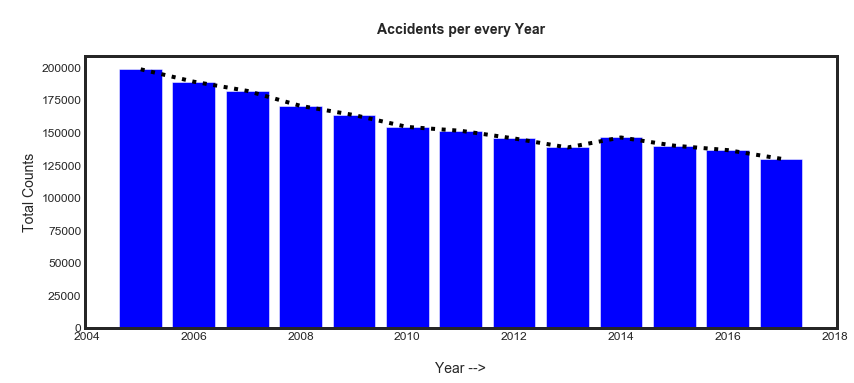

In [14]:
yearly_count = accidents_info['Date'].dt.year.value_counts().sort_index(ascending=False)
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(yearly_count.index, yearly_count.values, color='blue')
ax.plot(yearly_count, linestyle=':', color='black')
ax.set_title('\nAccidents per every Year\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nYear -->')
ax.set(ylabel='\nTotal Counts')

## Merging Accident_info And Vehicle_info

In [15]:
merged_df = pd.merge(vehicles_info, accidents_info, how = 'inner', on = 'Accident_Index')

In [16]:
merged_df.head()

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Year_y,InScotland,Time_Strap
0,200501BS00002,36 - 45,3.0,Data missing or out of range,NaN,8268.0,None,None,Journey as part of work,Leaving roundabout,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,Urban,Fine no high winds,2005,No,afternoon Hours (15-19)
1,200501BS00003,26 - 35,5.0,Urban area,3.0,8300.0,Parked vehicle,None,Journey as part of work,Not at or within 20 metres of junction,...,Metropolitan Police,Dry,Single carriageway,None,30.0,Urban,Fine no high winds,2005,No,night Hours (23-5)
2,200501BS00004,46 - 55,4.0,Urban area,1.0,1769.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,...,Metropolitan Police,Dry,Single carriageway,None,30.0,Urban,Fine no high winds,2005,No,office hours (10-15)
3,200501BS00005,46 - 55,10.0,Data missing or out of range,NaN,85.0,Kerb,None,Other/Not known (2005-10),Not at or within 20 metres of junction,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,Urban,Fine no high winds,2005,No,evening Hours (19-23)
4,200501BS00006,46 - 55,1.0,Urban area,4.0,2976.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,...,Metropolitan Police,Wet or damp,Single carriageway,Oil or diesel,30.0,Urban,Raining no high winds,2005,No,office hours (10-15)


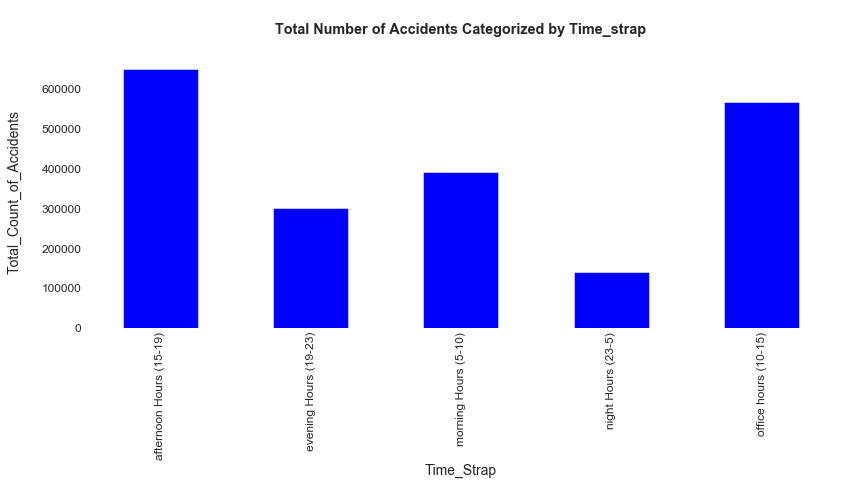

In [17]:
accidents_info.groupby('Time_Strap').size().plot(kind='bar', color='Blue', figsize=(12,5), grid=False)
plt.xlabel('Time_Strap',rotation='horizontal')
plt.ylabel('Total_Count_of_Accidents\n')
plt.title('\nTotal Number of Accidents Categorized by Time_strap\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);

## OUTLIERS

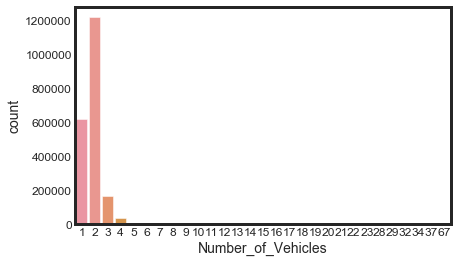

In [18]:
sns.countplot(accidents_info['Number_of_Vehicles'])

In [19]:
accidents_info = accidents_info[accidents_info.Number_of_Vehicles.astype(int) <= 5]

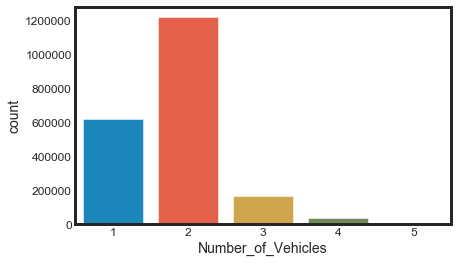

In [20]:
sns.countplot(accidents_info['Number_of_Vehicles'])

## Severity_Classification

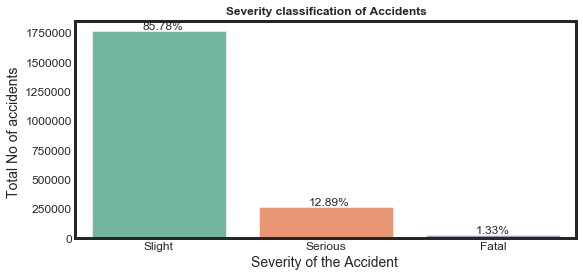

In [21]:
ax = sns.countplot(x = merged_df.Accident_Severity ,palette="Set2")
sns.set(font_scale=1)
ax.set_xlabel('Severity of the Accident ')
ax.set_ylabel('Total No of accidents ')
ax.set_title('Severity classification of Accidents',fontweight='bold' )
fig = plt.gcf()
fig.set_size_inches(8,4)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(merged_df.Accident_Severity)), (p.get_x()+ 0.3, p.get_height()+10000))



In [22]:
null_count = merged_df.isnull().sum()

In [23]:
null_count[null_count>0]

Age_of_Vehicle                                 337926
Driver_IMD_Decile                              689154
Engine_Capacity_.CC.                           250292
make                                           110832
model                                          299328
Propulsion_Code                                233574
Vehicle_Location.Restricted_Lane                 1124
1st_Road_Number                                     1
2nd_Road_Class                                 827862
2nd_Road_Number                                 18917
Did_Police_Officer_Attend_Scene_of_Accident       112
Latitude                                          124
Location_Easting_OSGR                             124
Location_Northing_OSGR                            124
Longitude                                         125
LSOA_of_Accident_Location                      139096
Pedestrian_Crossing-Human_Control                 652
Pedestrian_Crossing-Physical_Facilities          1368
Speed_limit                 

Considering the Attributes which actually contributes to the prediction and leaving out others.

In [25]:
df = merged_df[['Accident_Index', '1st_Road_Class','Day_of_Week', 'Junction_Detail','Light_Conditions', 'Number_of_Casualties',
          'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site', 'Speed_limit',
          'Time_Strap', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Age_Band_of_Driver', 'Age_of_Vehicle',
          'Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway', 'make', 'Engine_Capacity_.CC.', 'Sex_of_Driver',
          'Skidding_and_Overturning', 'Vehicle_Manoeuvre', 'Vehicle_Type', 'Accident_Severity'
         ]]



In [26]:
df.head()

,Accident_Index,1st_Road_Class,Day_of_Week,Junction_Detail,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,...,Age_of_Vehicle,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,make,Engine_Capacity_.CC.,Sex_of_Driver,Skidding_and_Overturning,Vehicle_Manoeuvre,Vehicle_Type,Accident_Severity
0,200501BS00002,B,Wednesday,Crossroads,Darkness - lights lit,1,1,Dry,Dual carriageway,None,...,3.0,None,None,DENNIS,8268.0,Male,None,Slowing or stopping,Bus or coach (17 or more pass seats),Slight
1,200501BS00003,C,Thursday,Not at junction or within 20 metres,Darkness - lights lit,1,2,Dry,Single carriageway,None,...,5.0,Parked vehicle,None,DENNIS,8300.0,Male,None,Going ahead right-hand bend,Bus or coach (17 or more pass seats),Slight
2,200501BS00004,A,Friday,Not at junction or within 20 metres,Daylight,1,1,Dry,Single carriageway,None,...,4.0,None,None,NISSAN,1769.0,Female,None,Going ahead other,Car,Slight
3,200501BS00005,Unclassified,Monday,Not at junction or within 20 metres,Darkness - lighting unknown,1,1,Wet or damp,Single carriageway,None,...,10.0,Kerb,None,HONDA,85.0,Male,Skidded,Going ahead other,Motorcycle 125cc and under,Slight
4,200501BS00006,Unclassified,Tuesday,Not at junction or within 20 metres,Daylight,1,2,Wet or damp,Single carriageway,Oil or diesel,...,1.0,None,None,AUDI,2976.0,Male,None,Moving off,Car,Slight


In [27]:
df.isnull().any()

Accident_Index                False
1st_Road_Class                False
Day_of_Week                   False
Junction_Detail               False
Light_Conditions              False
Number_of_Casualties          False
Number_of_Vehicles            False
Road_Surface_Conditions       False
Road_Type                     False
Special_Conditions_at_Site    False
Speed_limit                    True
Time_Strap                    False
Urban_or_Rural_Area           False
Weather_Conditions            False
Age_Band_of_Driver            False
Age_of_Vehicle                 True
Hit_Object_in_Carriageway     False
Hit_Object_off_Carriageway    False
make                           True
Engine_Capacity_.CC.           True
Sex_of_Driver                 False
Skidding_and_Overturning      False
Vehicle_Manoeuvre             False
Vehicle_Type                  False
Accident_Severity             False
dtype: bool

In [28]:
df.describe()

,Number_of_Casualties,Number_of_Vehicles,Speed_limit,Age_of_Vehicle,Engine_Capacity_.CC.
count,2.058262e+06,2.058262e+06,2.058197e+06,1.720336e+06,1.807970e+06
mean,1.449619e+00,2.124039e+00,3.975690e+01,7.143342e+00,2.028279e+03
std,1.033511e+00,9.641712e-01,1.460913e+01,4.728791e+00,1.914112e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,2.000000e+00,3.000000e+01,3.000000e+00,1.299000e+03
50%,1.000000e+00,2.000000e+00,3.000000e+01,7.000000e+00,1.598000e+03
75%,2.000000e+00,2.000000e+00,5.000000e+01,1.000000e+01,1.997000e+03
max,9.300000e+01,6.700000e+01,7.000000e+01,1.110000e+02,9.600000e+04


## Missing Value Propportions in both the Data Sets:

In [29]:
print('Missing Values % in Accidents_info :', 
      round(accidents_info.isna().sum().sum()/len(accidents_info),3), '%')

Missing Values % in Accidents_info : 0.495 %


In [30]:
print('Missing Values % in vehicles_info :', 
      round(vehicles_info .isna().sum().sum()/len(vehicles_info),3), '%')

Missing Values % in vehicles_info : 0.938 %


## TIME SERIES ANALYSIS

[Text(0.5, 0, 'Year Interval\n')]

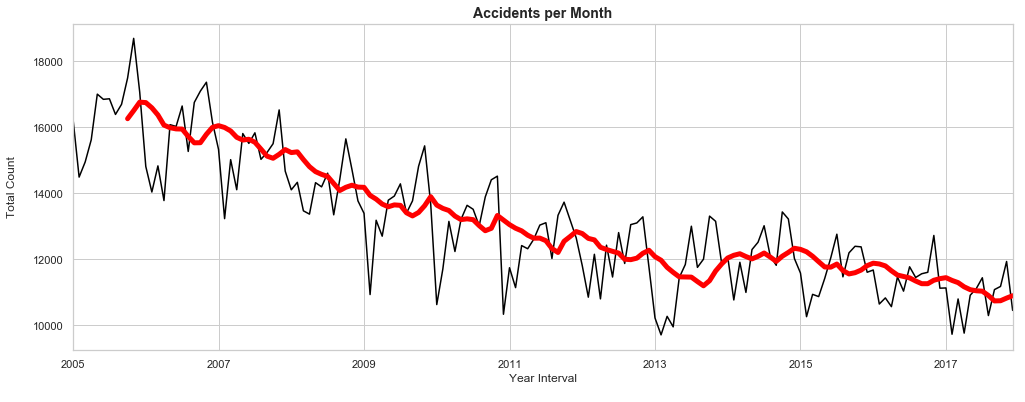

In [31]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(15,6))
y=accidents_info.set_index('Date').resample('M').size().plot(label='Total Accidents per Month', color='black', ax=ax)
z=accidents_info.set_index('Date').resample('M').size().rolling(window=10).mean()\
                           .plot(color='red', linewidth=5, label='Average for every 10 months', ax=ax)
ax.set_title('Accidents per Month', fontsize=14, fontweight='bold')
ax.set(ylabel='Total Count\n')
ax.set(xlabel='Year Interval\n')

In [32]:
accidents = accidents_info.groupby('Date')['Accident_Severity'].sum().reset_index()

In [33]:
accidents = accidents.set_index('Date')
accidents.index

DatetimeIndex(['2005-01-01', '2005-01-02', '2005-01-03', '2005-01-04',
               '2005-01-05', '2005-01-06', '2005-01-07', '2005-01-08',
               '2005-01-09', '2005-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4748, freq=None)

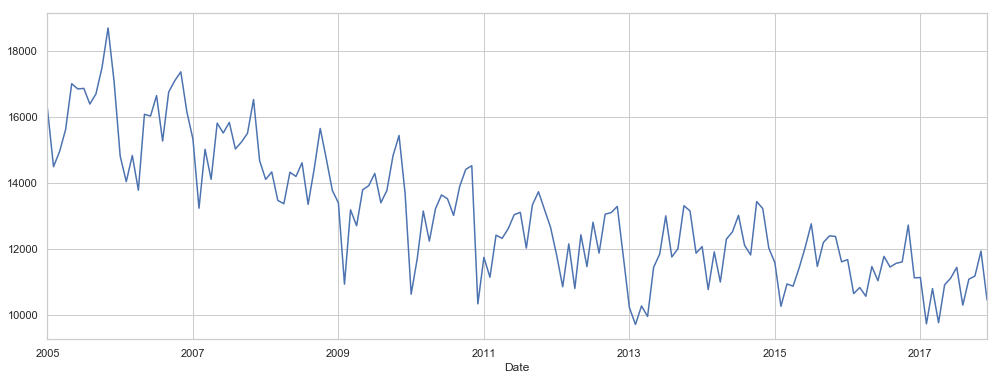

In [34]:

y=accidents_info.set_index('Date').resample('M').size()
y.plot(figsize=(15, 6))
plt.show()

### Decomposotion into Distinct Components - Trend, Seasonality, Noise

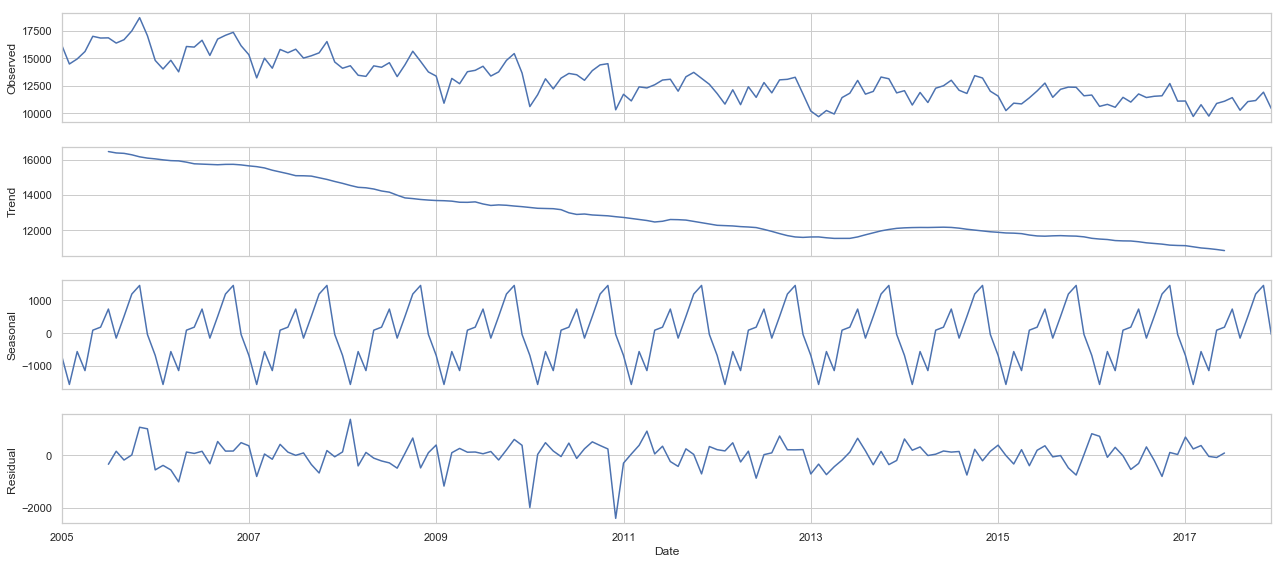

In [35]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

### TIME SERIES FORECASTING - ARIMA:

In [36]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [37]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3383.639496276718
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3011.6686203347153
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2365.8143250890926
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2169.243205818666
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2333.552354554812
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2310.5084410360355
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2185.2221757540956
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2170.963442220043
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3256.3871113388054
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2975.888580958688
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2339.835205408486
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2128.3375737383085
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2335.3026444619472
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2294.985196999611
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2164.2075294276874
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2129.2363269545135
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2584.735548004559
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2366.6051436542148


/Users/vishnumohan/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2344.322722044792
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:2322.9019143736487
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:2050.196496517372
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:2317.0361225741935


/Users/vishnumohan/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2241.4574471475535
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:2112.4370356266118
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:2052.1690846509896
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:2576.3188929994726
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:2341.336423902169
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:2342.9135959229643
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:2062.1178808947016
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:2308.485537902895
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:2257.147459286515
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:2096.1071251406743
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:2062.4453522210742
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:2551.4884457509957
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2315.5505912306453
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:2303.1346085216182
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:2026.5052818749045
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:2283.091867325319
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2209.021061432174
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:2077.68699174561

In [38]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0488      0.116     -0.422      0.673      -0.275       0.178
ma.L1         -0.6527      0.087     -7.476      0.000      -0.824      -0.482
ar.S.L12      -0.5295      0.062     -8.569      0.000      -0.651      -0.408
sigma2       4.67e+05   4.23e+04     11.032      0.000    3.84e+05     5.5e+05


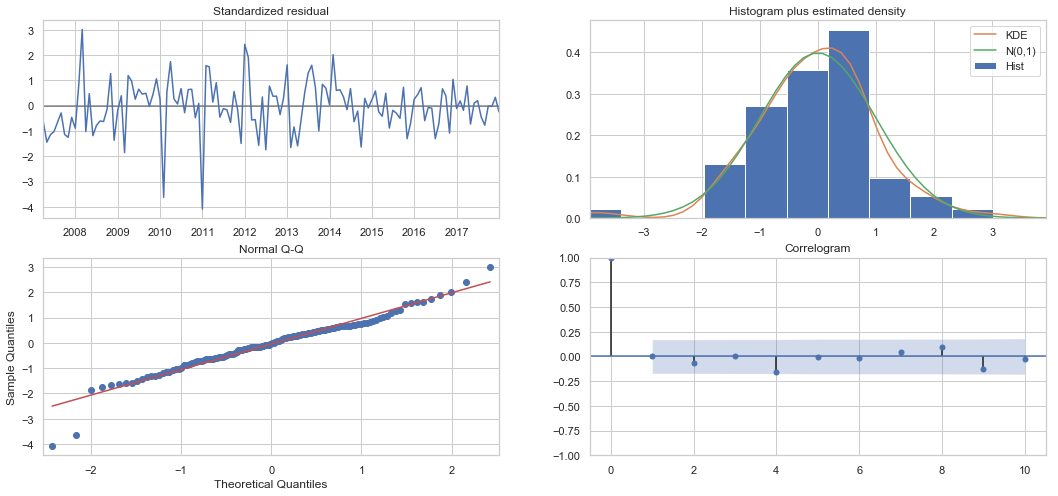

In [39]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

### Forecast Predictions:

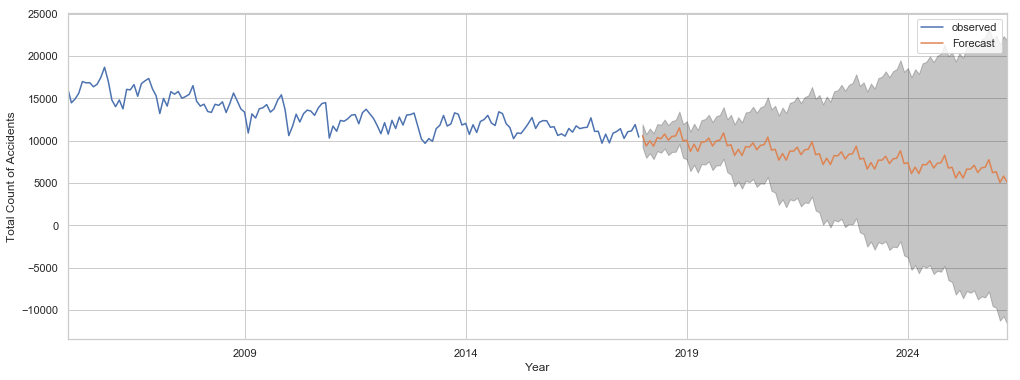

In [40]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(15, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Year')
ax.set_ylabel('Total Count of Accidents')
plt.legend()
plt.show()

### Driver_Details VS Sex_of_Driver

In [43]:
vehicles_info.Sex_of_Driver.value_counts(normalize=True)

Male                            0.674296
Female                          0.290742
Not known                       0.034931
Data missing or out of range    0.000031
Name: Sex_of_Driver, dtype: float64

In [44]:
driver_details = vehicles_info.groupby(['Age_Band_of_Driver', 'Sex_of_Driver']).size().reset_index()

In [45]:
driver_details.drop(driver_details[(driver_details['Age_Band_of_Driver'] == 'Data missing or out of range') | \
                     (driver_details['Sex_of_Driver'] == 'Not known') | \
                     (driver_details['Sex_of_Driver'] == 'Data missing or out of range')]\
                     .index, axis=0, inplace=True)

In [46]:
driver_details.columns = ['Age_Band_of_Driver', 'Sex_of_Driver', 'Count']

In [47]:
driver_details.head()

,Age_Band_of_Driver,Sex_of_Driver,Count
0,0 - 5,Female,27
1,0 - 5,Male,94
3,11 - 15,Female,399
4,11 - 15,Male,3254
6,16 - 20,Female,53326


In [48]:
driver_details

,Age_Band_of_Driver,Sex_of_Driver,Count
0,0 - 5,Female,27
1,0 - 5,Male,94
3,11 - 15,Female,399
4,11 - 15,Male,3254
6,16 - 20,Female,53326
7,16 - 20,Male,122115
10,21 - 25,Female,79778
11,21 - 25,Male,158333
14,26 - 35,Female,141470
15,26 - 35,Male,306282


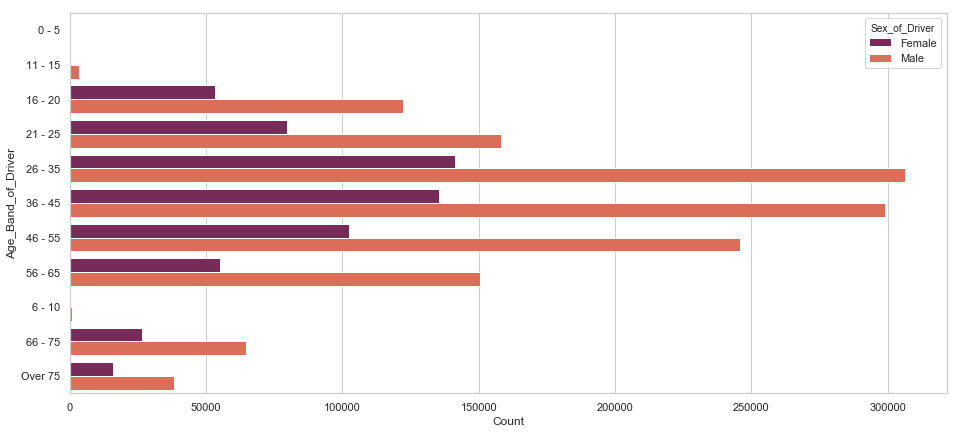

In [50]:
ax = plt.subplots(figsize=(14, 7))
sns.barplot(y='Age_Band_of_Driver', x='Count', hue='Sex_of_Driver', data=driver_details, palette='rocket')


In [51]:
df.head()

,Accident_Index,1st_Road_Class,Day_of_Week,Junction_Detail,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,...,Age_of_Vehicle,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,make,Engine_Capacity_.CC.,Sex_of_Driver,Skidding_and_Overturning,Vehicle_Manoeuvre,Vehicle_Type,Accident_Severity
0,200501BS00002,B,Wednesday,Crossroads,Darkness - lights lit,1,1,Dry,Dual carriageway,None,...,3.0,None,None,DENNIS,8268.0,Male,None,Slowing or stopping,Bus or coach (17 or more pass seats),Slight
1,200501BS00003,C,Thursday,Not at junction or within 20 metres,Darkness - lights lit,1,2,Dry,Single carriageway,None,...,5.0,Parked vehicle,None,DENNIS,8300.0,Male,None,Going ahead right-hand bend,Bus or coach (17 or more pass seats),Slight
2,200501BS00004,A,Friday,Not at junction or within 20 metres,Daylight,1,1,Dry,Single carriageway,None,...,4.0,None,None,NISSAN,1769.0,Female,None,Going ahead other,Car,Slight
3,200501BS00005,Unclassified,Monday,Not at junction or within 20 metres,Darkness - lighting unknown,1,1,Wet or damp,Single carriageway,None,...,10.0,Kerb,None,HONDA,85.0,Male,Skidded,Going ahead other,Motorcycle 125cc and under,Slight
4,200501BS00006,Unclassified,Tuesday,Not at junction or within 20 metres,Daylight,1,2,Wet or damp,Single carriageway,Oil or diesel,...,1.0,None,None,AUDI,2976.0,Male,None,Moving off,Car,Slight


In [52]:
df.describe()

,Number_of_Casualties,Number_of_Vehicles,Speed_limit,Age_of_Vehicle,Engine_Capacity_.CC.
count,2.058262e+06,2.058262e+06,2.058197e+06,1.720336e+06,1.807970e+06
mean,1.449619e+00,2.124039e+00,3.975690e+01,7.143342e+00,2.028279e+03
std,1.033511e+00,9.641712e-01,1.460913e+01,4.728791e+00,1.914112e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,2.000000e+00,3.000000e+01,3.000000e+00,1.299000e+03
50%,1.000000e+00,2.000000e+00,3.000000e+01,7.000000e+00,1.598000e+03
75%,2.000000e+00,2.000000e+00,5.000000e+01,1.000000e+01,1.997000e+03
max,9.300000e+01,6.700000e+01,7.000000e+01,1.110000e+02,9.600000e+04


In [53]:
df.columns

Index(['Accident_Index', '1st_Road_Class', 'Day_of_Week', 'Junction_Detail',
       'Light_Conditions', 'Number_of_Casualties', 'Number_of_Vehicles',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time_Strap', 'Urban_or_Rural_Area',
       'Weather_Conditions', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway', 'make',
       'Engine_Capacity_.CC.', 'Sex_of_Driver', 'Skidding_and_Overturning',
       'Vehicle_Manoeuvre', 'Vehicle_Type', 'Accident_Severity'],
      dtype='object')

In [54]:
df.corr()

,Number_of_Casualties,Number_of_Vehicles,Speed_limit,Age_of_Vehicle,Engine_Capacity_.CC.
Number_of_Casualties,1.000000,0.382233,0.148501,-0.004052,0.013740
Number_of_Vehicles,0.382233,1.000000,0.161666,-0.041110,-0.004579
Speed_limit,0.148501,0.161666,1.000000,-0.033289,0.078281
Age_of_Vehicle,-0.004052,-0.041110,-0.033289,1.000000,-0.077765
Engine_Capacity_.CC.,0.013740,-0.004579,0.078281,-0.077765,1.000000


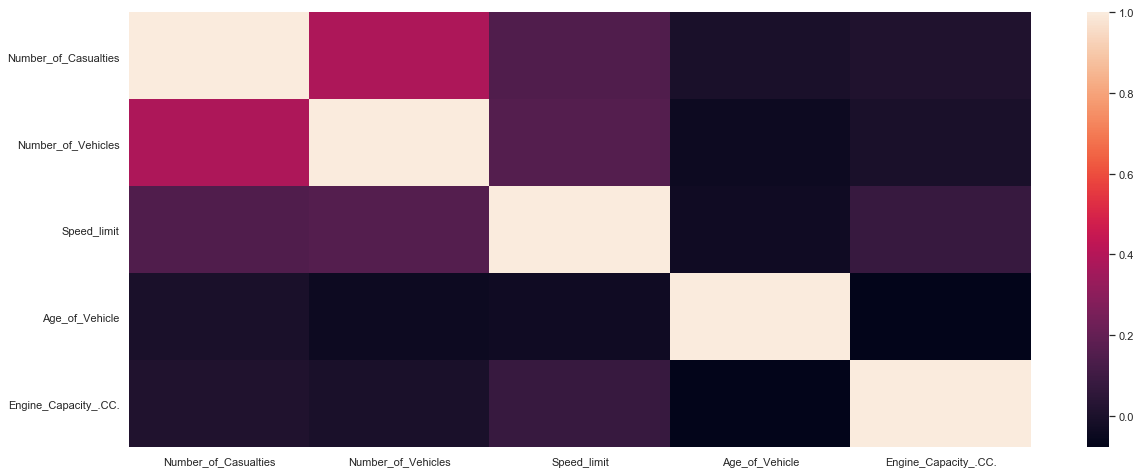

In [55]:
sns.heatmap(df.corr())

In [56]:
df.columns

Index(['Accident_Index', '1st_Road_Class', 'Day_of_Week', 'Junction_Detail',
       'Light_Conditions', 'Number_of_Casualties', 'Number_of_Vehicles',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time_Strap', 'Urban_or_Rural_Area',
       'Weather_Conditions', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway', 'make',
       'Engine_Capacity_.CC.', 'Sex_of_Driver', 'Skidding_and_Overturning',
       'Vehicle_Manoeuvre', 'Vehicle_Type', 'Accident_Severity'],
      dtype='object')

In [57]:
X= df[['Accident_Index', '1st_Road_Class', 'Day_of_Week', 'Junction_Detail',
       'Light_Conditions', 'Number_of_Casualties', 'Number_of_Vehicles',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time_Strap', 'Urban_or_Rural_Area',
       'Weather_Conditions', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway', 'make',
       'Engine_Capacity_.CC.', 'Sex_of_Driver', 'Skidding_and_Overturning',
       'Vehicle_Manoeuvre', 'Vehicle_Type',]]

In [58]:
y = df['Accident_Severity']

### Categorising Accident_severity to Slight & Severe

In [59]:
df['Accident_Severity'] = df['Accident_Severity'].replace(['Serious', 'Fatal'], 'Serious or Fatal')
df = pd.get_dummies(df, columns=['Accident_Severity'])
df = df.drop('Accident_Severity_Serious or Fatal', axis=1)
df.Accident_Severity_Slight.value_counts(normalize=True)

1    0.857779
0    0.142221
Name: Accident_Severity_Slight, dtype: float64

In [60]:
plt.figure(figsize=(14,5))
acc_slight = df.Accident_Severity_Slight == 1
acc_severe = df.Accident_Severity_Slight == 0

<Figure size 1008x360 with 0 Axes>

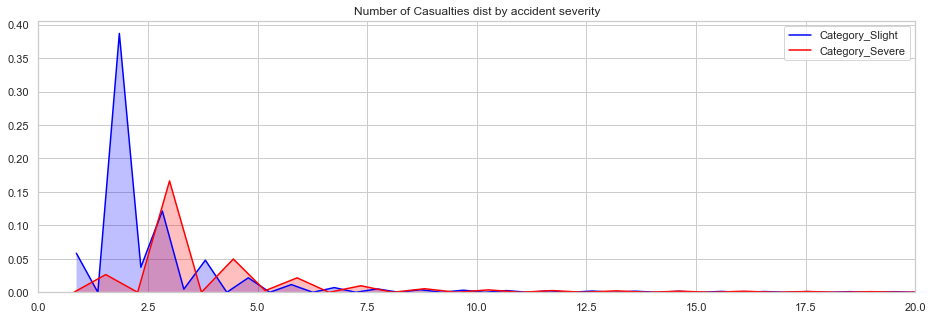

In [61]:
plt.figure(figsize=(14,5))
acc_slight = df.Accident_Severity_Slight == 1
acc_severe = df.Accident_Severity_Slight == 0
sns.kdeplot(df.Number_of_Casualties[acc_slight],shade=True,color='Blue', label='Category_Slight').set_xlim(0,20)
sns.kdeplot(df.Number_of_Casualties[acc_severe],shade=True,color='Red', label='Category_Severe').set_xlim(0,20)

plt.title('Number of Casualties dist by accident severity')
plt.show()

In [62]:
df.columns

Index(['Accident_Index', '1st_Road_Class', 'Day_of_Week', 'Junction_Detail',
       'Light_Conditions', 'Number_of_Casualties', 'Number_of_Vehicles',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time_Strap', 'Urban_or_Rural_Area',
       'Weather_Conditions', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway', 'make',
       'Engine_Capacity_.CC.', 'Sex_of_Driver', 'Skidding_and_Overturning',
       'Vehicle_Manoeuvre', 'Vehicle_Type', 'Accident_Severity_Slight'],
      dtype='object')

In [63]:
X= df[['Number_of_Casualties','Number_of_Vehicles','Speed_limit','Age_of_Vehicle','Engine_Capacity_.CC.']]

In [64]:
y = df['Accident_Severity_Slight']

## Linear Regression:

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.4, random_state=101)
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()
X_train.fillna(X_train.mean(), inplace=True)

In [73]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.4, random_state=101)

In [74]:
from sklearn.linear_model import LinearRegression 

In [75]:
lm = LinearRegression()
X_train.fillna(X_train.mean(), inplace=True)

In [76]:
lm.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [77]:
print(lm.intercept_)


0.9407455679067871


In [78]:
lm.coef_

array([-3.37454688e-02,  2.52886605e-02, -1.89415178e-03, -1.58353156e-03,
       -4.44271916e-07])

In [79]:
cdf= pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [80]:
cdf

,Coeff
Number_of_Casualties,-3.374547e-02
Number_of_Vehicles,2.528866e-02
Speed_limit,-1.894152e-03
Age_of_Vehicle,-1.583532e-03
Engine_Capacity_.CC.,-4.442719e-07


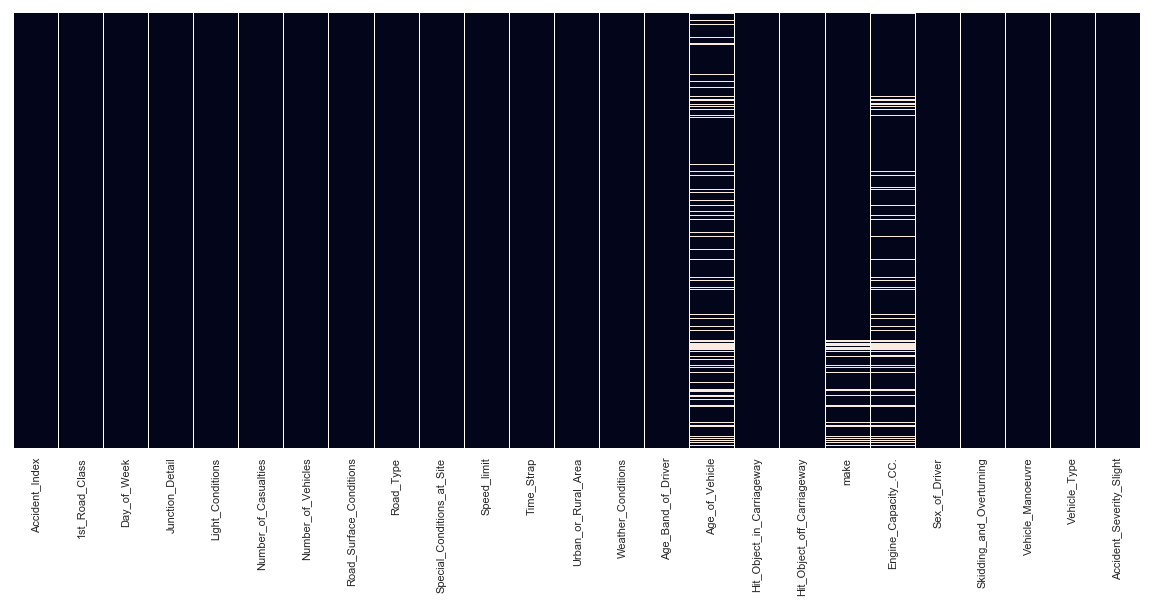

In [65]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

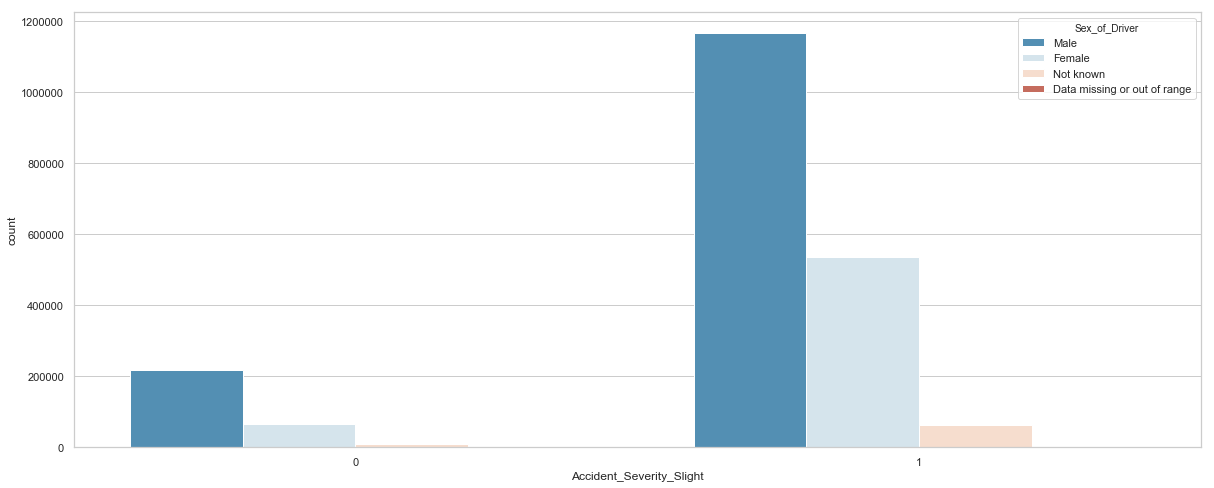

In [66]:
sns.countplot(x='Accident_Severity_Slight',hue='Sex_of_Driver',data=df, palette='RdBu_r')

In [67]:
df = df[df.Sex_of_Driver.notnull()]

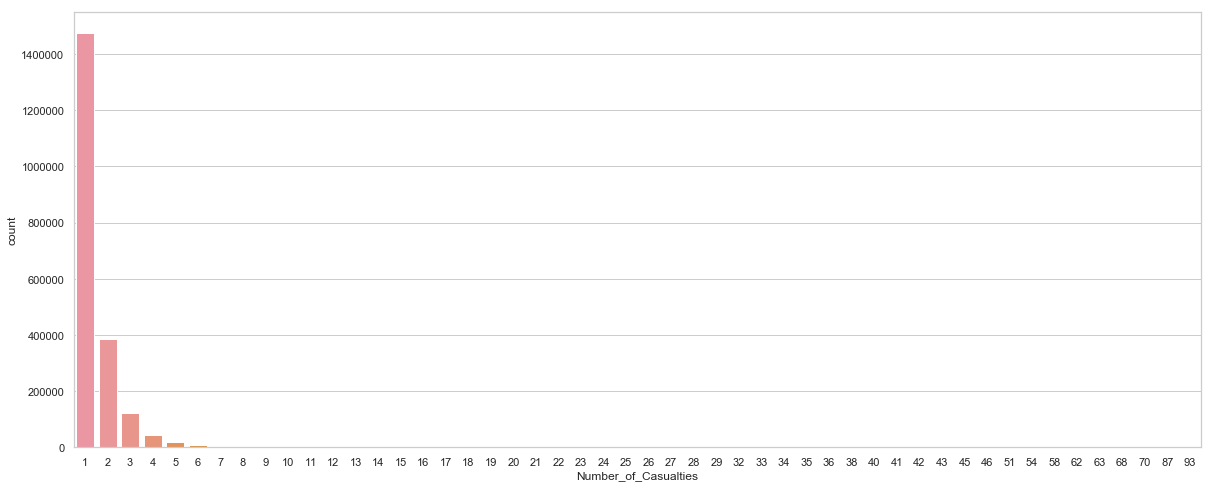

In [68]:
sns.countplot(x='Number_of_Casualties',data=df)

In [69]:
df.head()

,Accident_Index,1st_Road_Class,Day_of_Week,Junction_Detail,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,...,Age_of_Vehicle,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,make,Engine_Capacity_.CC.,Sex_of_Driver,Skidding_and_Overturning,Vehicle_Manoeuvre,Vehicle_Type,Accident_Severity_Slight
0,200501BS00002,B,Wednesday,Crossroads,Darkness - lights lit,1,1,Dry,Dual carriageway,None,...,3.0,None,None,DENNIS,8268.0,Male,None,Slowing or stopping,Bus or coach (17 or more pass seats),1
1,200501BS00003,C,Thursday,Not at junction or within 20 metres,Darkness - lights lit,1,2,Dry,Single carriageway,None,...,5.0,Parked vehicle,None,DENNIS,8300.0,Male,None,Going ahead right-hand bend,Bus or coach (17 or more pass seats),1
2,200501BS00004,A,Friday,Not at junction or within 20 metres,Daylight,1,1,Dry,Single carriageway,None,...,4.0,None,None,NISSAN,1769.0,Female,None,Going ahead other,Car,1
3,200501BS00005,Unclassified,Monday,Not at junction or within 20 metres,Darkness - lighting unknown,1,1,Wet or damp,Single carriageway,None,...,10.0,Kerb,None,HONDA,85.0,Male,Skidded,Going ahead other,Motorcycle 125cc and under,1
4,200501BS00006,Unclassified,Tuesday,Not at junction or within 20 metres,Daylight,1,2,Wet or damp,Single carriageway,Oil or diesel,...,1.0,None,None,AUDI,2976.0,Male,None,Moving off,Car,1


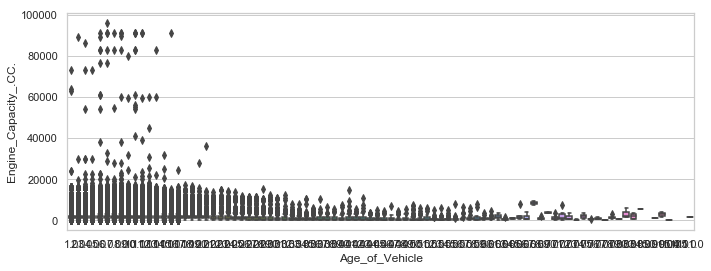

In [70]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Age_of_Vehicle',y='Engine_Capacity_.CC.',data=df)

##### Note: Since the Dataset is large Computation took lot of time and gets interrrupted at times. Hence i have computed the prediction values and uploaded the screenshots of the respective models in the report.

Code for models are as follows

### Logistic Regression

In [82]:
X_train.head()

,Number_of_Casualties,Number_of_Vehicles,Speed_limit,Age_of_Vehicle,Engine_Capacity_.CC.
630252,2,2,40.0,2.000000,2402.000000
1675331,1,2,30.0,7.143055,2028.275644
1770064,1,2,30.0,12.000000,998.000000
1265899,1,4,30.0,4.000000,125.000000
1808199,1,2,30.0,6.000000,1798.000000


In [83]:
y_train.head()

630252     0
1675331    1
1770064    1
1265899    0
1808199    1
Name: Accident_Severity_Slight, dtype: uint8

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=101)
from sklearn.linear_model import LogisticRegression

In [85]:
logmodel=LogisticRegression()
X_train.fillna(X_train.mean(), inplace=True)
X_test = X_test.fillna(X_train.mean())
X_test.fillna(X_train.mean(), inplace=True)

In [86]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [87]:
X_test.fillna(X_train.mean(), inplace=True)

In [88]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.45      0.00      0.01     87846
           1       0.86      1.00      0.92    529633

   micro avg       0.86      0.86      0.86    617479
   macro avg       0.66      0.50      0.46    617479
weighted avg       0.80      0.86      0.79    617479



In [89]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [90]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [91]:
probs = logmodel.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.60


In [92]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

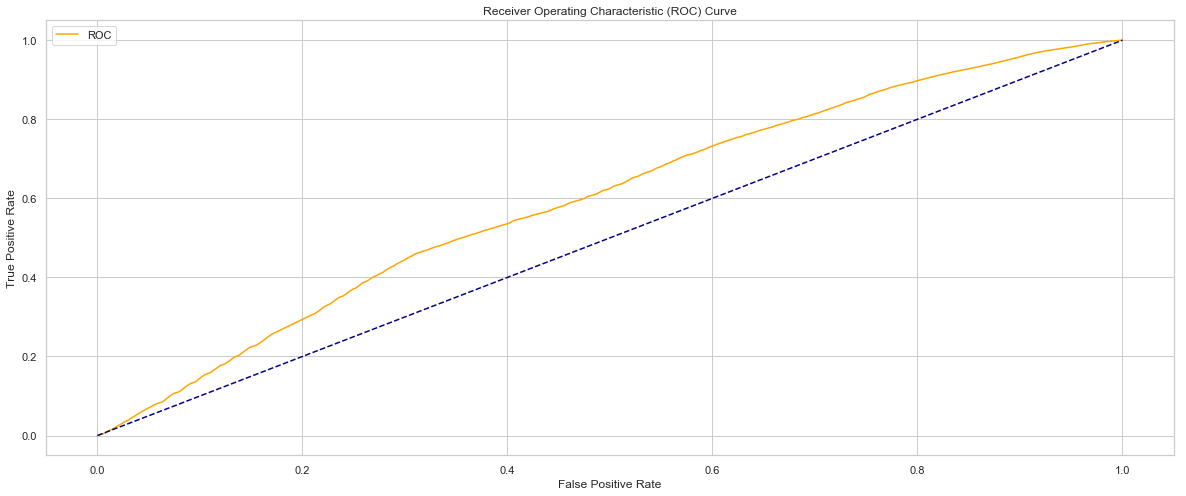

In [93]:
plot_roc_curve(fpr, tpr)

### KNeighbors Classifier

In [94]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [95]:
scaled_features = scaler.transform(X)

In [96]:
X_feat = pd.DataFrame(scaled_features,columns=X.columns)

In [97]:
X_feat.head()

,Number_of_Casualties,Number_of_Vehicles,Speed_limit,Age_of_Vehicle,Engine_Capacity_.CC.
0,-0.435041,-1.165809,-0.667863,-0.876195,3.259852
1,-0.435041,-0.128648,-0.667863,-0.453254,3.276570
2,-0.435041,-1.165809,-0.667863,-0.664724,-0.135457
3,-0.435041,-1.165809,-0.667863,0.604099,-1.015238
4,-0.435041,-0.128648,-0.667863,-1.299136,0.495123


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [99]:
X = X_feat
y = df['Accident_Severity_Slight']
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=101)

In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=2)

In [101]:
X_train.fillna(X_train.mean(), inplace=True)
X_test = X_test.fillna(X_train.mean())

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

### Decision Tree Classifier

In [ ]:
df.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = X_feat
y = df['Accident_Severity_Slight']
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=101)
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
X_train.fillna(X_train.mean(), inplace=True)
X_test = X_test.fillna(X_train.mean())



In [ ]:
dtree.fit(X_train,y_train)

In [ ]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
probs = dtree.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

In [ ]:
plot_roc_curve(fpr, tpr)

### RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer, OneHotEncoder, KBinsDiscretizer, MaxAbsScaler


In [ ]:
rfc = Pipeline([("Min_Max_Transformer", MaxAbsScaler()),("Clf",RandomForestClassifier(n_estimators=100, n_jobs=3))])

In [ ]:
rfc.fit(X_train, y_train)

In [ ]:
rfc.pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc.pred))
print('\n')
print(classification_report(y_test,rfc.pred))